In [1]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df = df.drop(columns='Gender')


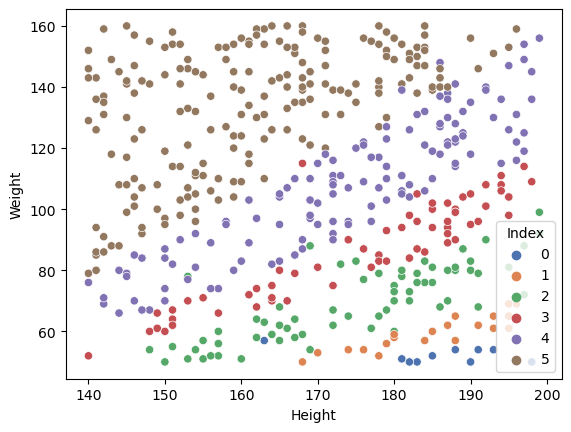

In [3]:
sns.scatterplot(x="Height", y="Weight", data=df, hue="Index",palette="deep")
plt.show()

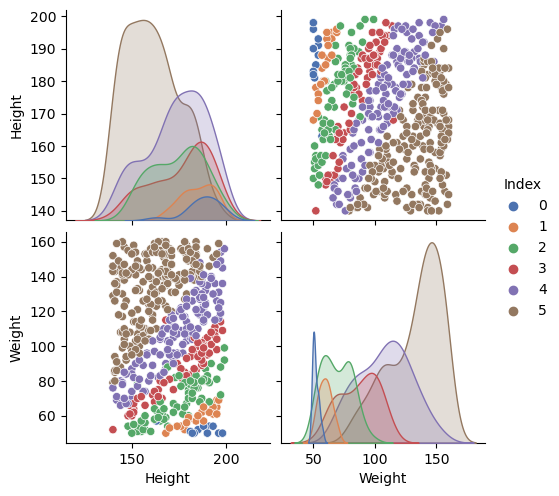

In [4]:
sns.pairplot(df, hue ='Index', palette="deep")

<Axes: >

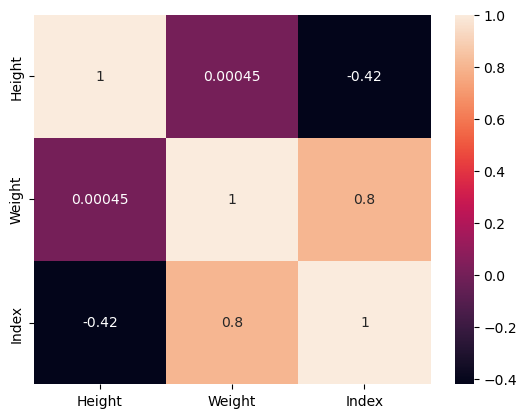

In [5]:
cols = df.corr()
sns.heatmap(cols, annot=True)

In [6]:
import random
from LinearRegression import LinearRegression
model = LinearRegression()
RANDOM_SEED = 0
random.seed(RANDOM_SEED)
dataList = df.values.tolist()
#random.shuffle(dataList) 
x = []
y = []
z = []
for row in dataList:
    x.append(row[0])
    y.append(row[1])
    z.append(row[2])
x_train = x[:250]
x_test  = x[250:]
y_train = y[:250]
y_test  = y[250:]
z_train = z[:250]
z_test  = z[250:]

model.fit(x_train,y_train,z_train)
test_pred = model.predict(x_test,y_test)
train_pred = model.predict(x_train,y_train)

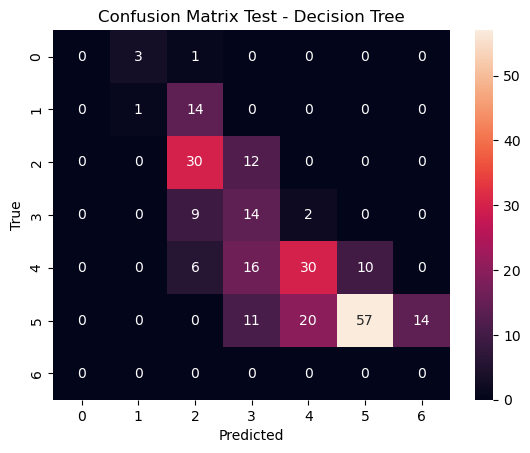

In [7]:
confusion_matrix_test = metrics.confusion_matrix(z_test,  

                                            test_pred)

matrix_df = pd.DataFrame(confusion_matrix_test)

ax = plt.axes()

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax)

ax.set_title('Confusion Matrix Test - Decision Tree')

ax.set_xlabel("Predicted", fontsize =10)

ax.set_ylabel("True", fontsize=10)

plt.show()

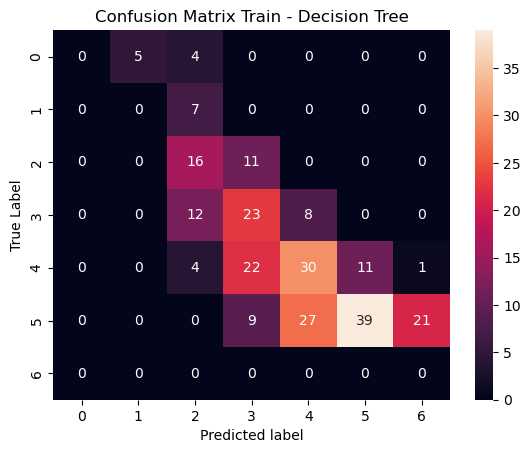

In [8]:
confusion_matrix_train = metrics.confusion_matrix(z_train,train_pred)

matrix_df = pd.DataFrame(confusion_matrix_train)

ax = plt.axes()

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax)

ax.set_title('Confusion Matrix Train - Decision Tree')

ax.set_xlabel("Predicted label", fontsize =10)

ax.set_ylabel("True Label", fontsize=10)

plt.show()

In [9]:
testAccuracy = metrics.r2_score(z_test,test_pred)
trainAccuracy = metrics.r2_score(z_train,train_pred)
print(f"Train R2 = {trainAccuracy} \nTest R2 = {testAccuracy}")

Train R2 = 0.5550955182683228 
Test R2 = 0.6382785423466469


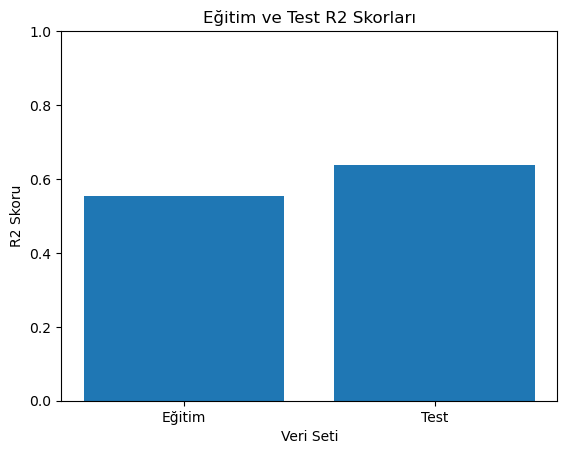

In [10]:
r2_scores = [trainAccuracy, testAccuracy]
labels = ['Eğitim', 'Test']
plt.bar(labels, r2_scores)
plt.xlabel('Veri Seti')
plt.ylabel('R2 Skoru')
plt.title('Eğitim ve Test R2 Skorları')
plt.ylim(0, 1)  # R2 skoru [0, 1] aralığında olmalıdır
plt.show()

In [11]:
testAccuracy = metrics.mean_squared_error(z_test,test_pred)
trainAccuracy = metrics.mean_squared_error(z_train,train_pred)
print(f"Train MSE= {trainAccuracy} \nTest MSE = {testAccuracy}")

Train MSE= 0.784 
Test MSE = 0.688


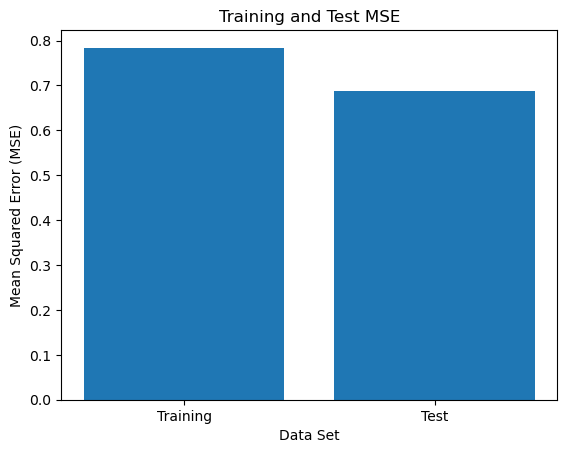

In [12]:
mse_scores = [trainAccuracy, testAccuracy]
labels = ['Training', 'Test']
plt.bar(labels, mse_scores)
plt.xlabel('Data Set')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Test MSE')
plt.show()

In [13]:
testAccuracy = metrics.mean_absolute_error(z_test,test_pred)
trainAccuracy = metrics.mean_absolute_error(z_train,train_pred)
print(f"Train MAE = {trainAccuracy} \nTest MAE = {testAccuracy}")

Train MAE = 0.64 
Test MAE = 0.544


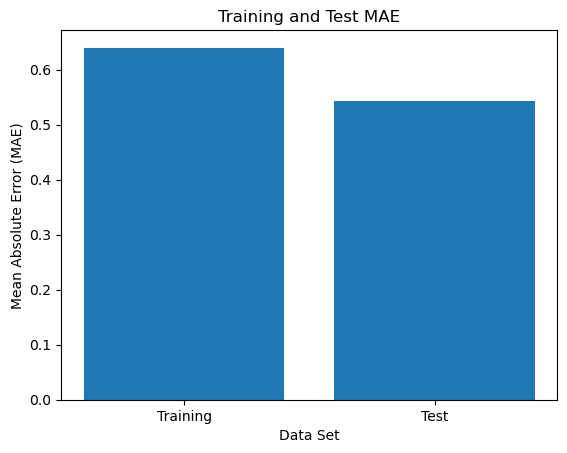

In [14]:
mae_scores = [trainAccuracy, testAccuracy]
labels = ['Training', 'Test']
plt.bar(labels, mae_scores)
plt.xlabel('Data Set')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Test MAE')
plt.show()

# Sonuçların yorumlanması

Modelin en yüksek başarısı MSE metriğine göre elde edilmiş, en düşük başarısı ise MAE metriğine göre elde edilmiştir. Train başarısının test'ten yüksek olması, modelin eğitim verilerine daha iyi uyarlandığına işaret eder. Model, eğitim verileri dışındaki verilere daha az uyum sağladığı için, test verileri üzerinde R2 skoru daha düşük olabilir.Sonuç olarak modelin eğitim verilerine daha iyi uyum sağlama ve eğitim verileri üzerinde daha iyi performans gösterme eğilimi vardır. Bu durum modelin overfitting yapmadığını gösterir.


